Aqui las referencias de la ACI:

<img src='./images/cortante1.jpg'>
<img src='./images/cortante2.jpg'>
<img src='./images/cortante3.jpg'>
<img src='./images/cortante4.jpg'>

Pontificia Universidad Catolica del Ecuador


Programa para calcular el corte en zapatas rectangulares

Autor: Nicolas Jativa
Fecha: 19/03/2023
Materia: Cimentaciones
Profesor: Carlos Celi
Tarea: numero 1


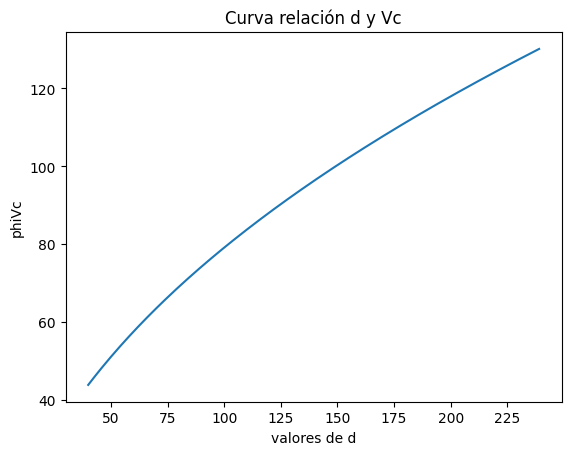

Vu1 es: 0.3652892561983471 Ton
Vu2 es: 3.3809550045913683 Ton
phiVc1 es: 43.894103336237634 Ton
phiVc2 es: 63.44693118601622 Ton
phiVc3 es: 85.98980753554459 Ton
phiVc2011 es: 48.22708782416786 Ton
phiVcmax es: 60.511346043531375 Ton
La carga de diseño al cortante es:  43.894103336237634 Ton
La carga de diseño al cortante, según la ACI 2011 es:  48.22708782416786 Ton


In [10]:
import numpy as np
import matplotlib.pyplot as plt



with open('test.txt', 'r') as f:
    f_contents = f.read(400)
    print(f_contents, end='')

cc = 40 #cm
cl = 40 #cm
B = 165 #cm
L = 165 #cm
bw = 100 #cm
A0 = B*L #cm

fprimc = 230 #kg/cm2
fy = 4200 #kg/cm2
phi = 0.75 
lmbda = 1 #Relación según resistencia del hormigón
direccion = 1

qa = 1.22 #kg/cm2
qu = 2.44 #kg/cm2
Pl = 1.3 #kg/cm2
Pd = 1.95 #kg/cm2

t = 0
if direccion == 1:
    t = cl
elif direccion == 0:
    t = cc

d = np.min([cc,cl]) #en cm
Psu = (1.2*Pd) + (1.6*Pl)
qsu = Psu / A0
e = B/2 - t/2 - d
beta = np.max([cc,cl])/np.min([cc,cl])


alphas = 40   # The value of alphaS is 40 for interior columns, 30 for edge columns, and 20 for corner columns. (22.6.5.3)
bo = ((2*d)+cc+cl)*2 #Perímetro de la sección crítica para cortante en dos direcciones en losas y zapatas, pulg.


Cortanteactual = np.zeros(200)
Cortante2011 = np.zeros(200)
dval = np.zeros(200)
Vu1mat = np.zeros(200)
Vu2mat = np.zeros(200)
phiVc1mat = np.zeros(200)
phiVc2mat = np.zeros(200)
phiVc3mat = np.zeros(200)
phiVc2011mat = np.zeros(200)
phiVcmaxmat = np.zeros(200)
phiVcd2mat = np.zeros(200)
phiVcdmat = np.zeros(200)



i=0

for de in range(d,240):

    lmbdas = np.sqrt(2/(1+(0.04*de)))
    if lmbdas <=1:
        lmbdas = lmbdas
    else:
        lmbdas = 1


    Vu1 = qsu*e*bw  #Cortante Unidireccional
    Vu1mat[i] = Vu1

    Vu2 = Psu - qsu*((t+de)**2)    #Cortante Bidireccional
    Vu2mat[i] = Vu2

    phiVc1 = phi*1.1*lmbda*lmbdas*np.sqrt(fprimc)*bw*de /1000    #ACI 22.6.5.2 (a)
    phiVc1mat[i] = phiVc1
    
    phiVc2 = phi*0.53*(1+(2/beta))*lmbdas*lmbda*np.sqrt(fprimc)*bw*de /1000    #ACI 22.6.5.2 (b)
    phiVc2mat[i] = phiVc2
    
    phiVc3 = phi*0.27*(2+((alphas*de)/bo))*lmbda*np.sqrt(fprimc)*bw*de /1000    #ACI 22.6.5.2 (c)
    phiVc3mat[i] = phiVc3

    phiVc2011 = phi*(1.06*np.sqrt(fprimc)*bw*de) /1000
    phiVc2011mat[i] = phiVc2011

    phiVcmax = phi*1.33*lmbda*np.sqrt(fprimc)*bw*de /1000    #ACI 22.5.5.1.1
    phiVcmaxmat[i] = phiVcmax
    

    phiVcd2 = np.min([phiVc1,phiVc2,phiVc3,phiVcmax])   #Resultado final tomando el menor de los tres
    phiVcd2mat[i] = phiVcd2

    phiVcd = np.min([phiVc2011,phiVcmax])       #Resultado considerando la norma del 2011
    phiVcdmat[i] = phiVcd

    Cortanteactual[i] = phiVcd2
    Cortante2011[i] = phiVcd
    dval[i] = de
 
    # print('phiVcd2 es:',phiVcd2)  #En toneladas/m
    # print('phiVcd es:',phiVcd)  #En toneladas/m
    # print('El valor de d es: ', de)
    i+=1


qq = [0,199]
Cortantefin1 = [np.delete(Cortanteactual,qq)]
Cortantefin20111 = [np.delete(Cortante2011,qq)]
dval1 = np.delete(dval,qq)

Cortantefin = np.min([Cortantefin1])
Cortantefin2011 = np.min([Cortantefin20111])

#Graficador
fig, ax = plt.subplots()
ax.plot(dval, Cortanteactual, label='Cortante ACI 318-19')
# ax.plot(dval, Cortante2011)
ax.set_xlabel('valores de d')
ax.set_ylabel('phiVc')
ax.set_title('Curva relación d y Vc')
# ax.legend()

plt.show()
#Fin Graficador


print(f'Vu1 es: {Vu1mat[0]} Ton')  #En toneladas/m
print(f'Vu2 es: {Vu2mat[0]} Ton')  #En toneladas/m
print(f'phiVc1 es: {phiVc1mat[0]} Ton')  #En toneladas/m
print(f'phiVc2 es: {phiVc2mat[0]} Ton')  #En toneladas/m
print(f'phiVc3 es: {phiVc3mat[0]} Ton')  #En toneladas/m
print(f'phiVc2011 es: {phiVc2011mat[0]} Ton')  #En toneladas/m
print(f'phiVcmax es: {phiVcmaxmat[0]} Ton')  #En toneladas/m
print(f'La carga de diseño al cortante es:  {Cortanteactual[0]} Ton') #En toneladas/m
print(f'La carga de diseño al cortante, según la ACI 2011 es:  {Cortante2011[0]} Ton') #En toneladas/m



# print('El valor de d debe ser: ', d)

